In [7]:
# Art and sports forums
art_forums = ['Art', 'painting', 'Sculpture', 'artTools', 'ArtCrit', 'ArtBuddy', 'ConceptArt','artlounge' ,'OilPainting',
              'learnart', 'Illustration', 'drawing', 'Watercolor', 'ArtistLounge', 'writing', 'writers', 'sciwrite', 
              'phd', 'freelanceWriters', 'composer', 'composition', 'sketchpad','Pastel','PixelArt','AnimeART','arttutorials',
              'drawings']
sport_forums = [
    "sports", "Fitness", "running", "soccer", "basketball", "youthsports", "mastersports", 
    "Fishing", "tabletennis", "tennis", "physicaltherapy", "Hanggliding", "ballroom", 
    "Croquet", "lawnbowls", "Handball", "Cornhole", "golf", "pilates", "taijiquan", 
    "baseball", "hockey", "MMA", "cycling", "swimming", "volleyball", "boxing", 
    "skiing", "surfing", "archery", "badminton", "rowing", "triathlon", "equestrian", 
    "fencing", "gymnastics", "karate", "rugby", "sailing", "skateboarding", 
    "snowboarding", "taekwondo", "weightlifting", "wrestling", 'bodybuilding','crossfit', 'football', 'climbing', 'Swimming','tajiquan','zumba'
]
not_creative_keywords = [
    "Burnout", "blocked", "creative block",
"Struggling", "difficulty", "can't",
"Lost", "losing", "lack",
"Stuck", "stagnant", "uninspired",
"Frustrated", "frustrating",
"Empty", "hollow",
"Overwhelmed", "discouraged", "demotivated",
"How to enjoy", "how to love again",
"Regain", "find again", "restart",
"Motivation", "inspiration",
"Start again", "back to", "return to",
"Find joy", "rediscover", "rekindle",
"Enjoy", "reconnect", "reengage",
"Sad", "frustrated", "bored",
"Not fun", "no joy", "tired",
"Lonely", "unsure", "defeated",
"Feel like giving up",
"How can I", "Why can’t I", "What do I do if",
"Help with", "Struggling to", "Can’t seem to",
"Art", "painting", "drawing", "illustrating",
"Writing", "poetry", "storytelling",
"Music", "composing", "creating",
"Crafting", "DIY", "making",
"Design", "photography", "acting",
"Lost motivation for [creative activity]",
"Can't seem to create anymore",
"How to start making art again",
"Struggling with creativity",
"Why do I feel stuck in [activity]?"
]
creative_keywords = [
    "Flow", "productive", "energized",
    "Inspired", "motivated", "excited",
    "Passionate", "dedicated", "focused",
    "Innovative", "original", "imaginative",
    "Empowered", "enthusiastic", "driven",
    "Creative spark", "lightbulb moment",
    "In the zone", "full of ideas",
    "Breakthrough", "progress", "momentum",
    "Fulfilled", "satisfied", "joyful",
    "Expressive", "playful", "free",
    "Exploring", "discovering", "experimenting",
    "Growing", "evolving", "learning",
    "Inventive", "visionary", "resourceful",
    "Crafting with purpose", "mastering",
    "Accomplished", "achieving goals",
    "Building", "designing", "making",
    "Creating", "writing", "painting",
    "Drawing", "sketching", "sculpting",
    "Storytelling", "writing poetry", "playing music",
    "Composing", "designing", "coding",
    "Photography", "filmmaking", "acting",
    "Hobbies", "crafts", "projects",
    "Collaboration", "sharing ideas", "brainstorming",
    "Unleashing creativity", "finding inspiration",
    "Seeing the world differently", "thinking outside the box",
    "Fresh perspective", "reimagining",
    "Making progress", "finishing projects",
    "Loving the process", "embracing the journey",
    "Discovering new techniques", "innovating",
    "Finding beauty", "expressing emotions",
    "Telling stories", "sharing experiences",
    "Artistic growth", "personal achievement",
    "Pursuing dreams", "bringing ideas to life",
    "Creative fulfillment", "expressing individuality",
    "Exploring new ideas", "trying something new",
    "Mastering skills", "overcoming challenges",
    "Feeling alive", "feeling accomplished",
    "Creative energy", "endless possibilities"
]
import pickle

# Load the .pkl file
with open( "art_posts.pkl", "rb") as file:
    art_posts = pickle.load(file)
with open( "art_posts_dic.pkl", "rb") as file:
    art_posts_dic = pickle.load(file)
with open( "art_users.pkl", "rb") as file:
    art_users = pickle.load(file)
with open( "filtered_art_posts.pkl", "rb") as file:
    filtered_art_posts = pickle.load(file)
with open( "filtered_sport_forums.pkl", "rb") as file:
    filtered_sport_forums = pickle.load(file)
with open( "filtered_sport_posts.pkl", "rb") as file:
    filtered_sport_posts = pickle.load(file)
with open( "sport_posts_dic.pkl", "rb") as file:
    sport_posts_dic = pickle.load(file)

In [ ]:
import praw
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict

# Reddit API credentials (replace with your own)
REDDIT_CLIENT_ID = "lMYhh7BNAjLrJQ_c7v0M5w"
REDDIT_CLIENT_SECRET = "Mq0R3nUw3FxCmfnqcLM4sIrLA1_dzg"
REDDIT_USER_AGENT = "your_user_agent"

# Initialize PRAW Reddit instance
reddit = praw.Reddit(client_id=REDDIT_CLIENT_ID,
                     client_secret=REDDIT_CLIENT_SECRET,
                     user_agent=REDDIT_USER_AGENT)

def get_top_posts(subreddit_name, limit=1000):
    """Fetch the top posts from a subreddit."""
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for post in subreddit.top(limit=limit):
        posts.append({    'title': post.title,
    'description': post.selftext,
    'author': str(post.author),
    'post_id': post.id,
    'subreddit': str(post.subreddit),
    'score': post.score,
    'comments_count': post.num_comments,
    'post_url': post.url,
    'created_utc': post.created_utc,
    'flair': post.link_flair_text,
    'nsfw': post.over_18,
    'stickied': post.stickied,
    'edited': post.edited,
    'awards': post.total_awards_received,
    'is_video': post.is_video,
    'is_self': post.is_self,
    'media': post.media,
    'domain': post.domain,
    })
    return posts

def get_unique_users(posts):
    """Extract unique users from the posts."""
    return set(post['author'] for post in posts if post['author'] != 'None')


def find_users_in_sports_forums(users, sport_forums):
    """Check if users from art forums have posts in sports forums and extract those posts."""
    user_activity = defaultdict(list)
    
    for user in users:
        try:
            redditor = reddit.redditor(user)
            for post in redditor.submissions.new(limit=None):  # Fetch all posts by the user
                if str(post.subreddit).lower() in (forum.lower() for forum in sport_forums):
                    user_activity[user].append({
                        'title': post.title,
                        'description': post.selftext,
                        'author': str(post.author),
                        'post_id': post.id,
                        'subreddit': str(post.subreddit),
                        'score': post.score,
                        'comments_count': post.num_comments,
                        'post_url': post.url,
                        'created_utc': post.created_utc,
                        'flair': post.link_flair_text,
                        'nsfw': post.over_18,
                        'stickied': post.stickied,
                        'edited': post.edited,
                        'awards': post.total_awards_received,
                        'is_video': post.is_video,
                        'is_self': post.is_self,
                        'media': post.media,
                        'domain': post.domain,
                       
                    })
        except Exception as e:
            print(f"Error fetching posts for user {user}: {e}")
    
    return user_activity


# Step 1: Extract top 1000 posts from art forums
art_posts = []
for forum in art_forums:
    try:
        art_posts.extend(get_top_posts(forum, limit=1000))
    except Exception as e:
            print(f"Error get top posts of the forum {forum}: {e}")

# Step 2: Get unique users from art forums
art_users = get_unique_users(art_posts)

# Step 3: Check if these users are active in sports forums
user_activity_in_sports = find_users_in_sports_forums(art_users, sport_forums)


In [9]:
# Save to a file
import pickle

with open('art_posts.pkl', 'wb') as file:
    pickle.dump(art_posts, file)
with open('art_users.pkl', 'wb') as file:
    pickle.dump(art_users, file)
with open('user_activity_in_sports.pkl', 'wb') as file:
    pickle.dump(user_activity_in_sports, file)
    

In [11]:
with open('art_posts.pkl', 'rb') as file:
    loaded_art_posts = pickle.load(file)
with open('art_users.pkl', 'rb') as file:
    loaded_art_users = pickle.load(file)
with open('user_activity_in_sports.pkl', 'rb') as file:
    loaded_user_activity_in_sports = pickle.load(file)

In [19]:
len(loaded_user_activity_in_sports)

892

In [ ]:
art_posts_dic = defaultdict(list)

# Initialize a list to store all posts by users from sport subreddits
unique_usernames = user_activity_in_sports.keys()
# Loop through each unique user and search for their posts in the sport subreddits
for username in unique_usernames:    
    # Search for posts by the user in sport-related subreddits
    target_art_subreddits_str = '+'.join(art_forums)  # Multi-subreddit search query
    search_query = f"author:{username}"
    
    # Search the subreddit
    try:
        
        for post in reddit.subreddit(target_art_subreddits_str).search(search_query, limit=100):  # Adjust limit as needed
            # Store the posts
            art_posts_dic[username].append({
                    'title': post.title,
                    'description': post.selftext,
                    'author': str(post.author),
                    'post_id': post.id,
                    'subreddit': str(post.subreddit),
                    'score': post.score,
                    'comments_count': post.num_comments,
                    'post_url': post.url,
                    'created_utc': post.created_utc,
                    'flair': post.link_flair_text,
                    'nsfw': post.over_18,
                    'stickied': post.stickied,
                    'edited': post.edited,
                    'awards': post.total_awards_received,
                    'is_video': post.is_video,
                    'is_self': post.is_self,
                    'media': post.media,
                    'domain': post.domain,
            })
    except Exception as e:
        print(f"Error fetching posts for user {username}: {e}")

import pickle
with open('art_posts_dic.pkl', 'wb') as file:
    pickle.dump(art_posts_dic, file)

print("Top 100 posts for each user saved.")


Top 100 posts for each user saved.


In [ ]:


filtered_art_posts = {}

for user, posts in art_posts_dic.items():
    filtered_posts = []
    for post in posts:
        if post['title'] and post['description']:
            content = f"{post['title']} {post['description']}".lower()
            if any(keyword in content for keyword in not_creative_keywords) or any(keyword in content for keyword in creative_keywords):
                filtered_posts.append(post)
    if filtered_posts:
        filtered_art_posts[user] = filtered_posts


# Save the filtered dictionary to a file
with open('filtered_art_posts.pkl', 'wb') as file:
    pickle.dump(filtered_art_posts, file)

print("Filtered art posts saved.")
len(filtered_art_posts)

Filtered art posts saved.


236

In [59]:
sport_posts_dic = defaultdict(list)

# Initialize a list to store all posts by users from sport subreddits
unique_usernames = user_activity_in_sports.keys()
# Loop through each unique user and search for their posts in the sport subreddits
for username in unique_usernames:    
    # Search for posts by the user in sport-related subreddits
    target_sport_subreddits_str = '+'.join(sport_forums)  # Multi-subreddit search query
    search_query = f"author:{username}"
    
    # Search the subreddit
    try:
        
        for post in reddit.subreddit(target_sport_subreddits_str).search(search_query, limit=100):  # Adjust limit as needed
            # Store the posts
            sport_posts_dic[username].append({
                    'title': post.title,
                    'description': post.selftext,
                    'author': str(post.author),
                    'post_id': post.id,
                    'subreddit': str(post.subreddit),
                    'score': post.score,
                    'comments_count': post.num_comments,
                    'post_url': post.url,
                    'created_utc': post.created_utc,
                    'flair': post.link_flair_text,
                    'nsfw': post.over_18,
                    'stickied': post.stickied,
                    'edited': post.edited,
                    'awards': post.total_awards_received,
                    'is_video': post.is_video,
                    'is_self': post.is_self,
                    'media': post.media,
                    'domain': post.domain,
            })
    except Exception as e:
        print(f"Error fetching posts for user {username}: {e}")

import pickle
with open('sport_posts_dic.pkl', 'wb') as file:
    pickle.dump(sport_posts_dic, file)

print("Top 100 posts for each user saved.")


Top 100 posts for each user saved.


In [75]:
def filter_sports_posts(sport_posts_dic):
    doing_sport_keywords = [
        "training", "exercise", "practice", "session", "workout", "routine", "run", "jog", "swim",
        "cycle", "ride", "lift", "stretch", "hike", "climb", "train", "play", "compete", "participate",
        "race", "goal", "personal best", "achievement", "completed", "weights", "equipment", "rehab"
    ]
    watching_sport_keywords = [
        "match", "game", "team", "player", "league", "tournament", "event", "spectate", "final",
        "championship", "win", "loss", "score", "points", "season", "draft", "trade", "coach", 
        "roster", "statistics", "analysis", "stream", "broadcast", "highlights", "coverage", "review", "world cup", "world tournament"
    ]

    filtered_user_activity = {}

    for user, posts in sport_posts_dic.items():
        filtered_posts = []
        for post in posts:
            content = f"{post['title']} {post['description']}".lower()
            if post['title'] and post['description'] and any(keyword in content for keyword in doing_sport_keywords) and not any(
                keyword in content for keyword in watching_sport_keywords) and user in filtered_art_posts.keys():
                filtered_posts.append(post)
        if filtered_posts:
            filtered_user_activity[user] = filtered_posts

    return filtered_user_activity
filtered_sport_posts = filter_sports_posts(sport_posts_dic)

# Save the filtered dictionary to a file
with open('filtered_sport_posts.pkl', 'wb') as file:
    pickle.dump(filtered_sport_posts, file)

print("Filtered user activity saved.")
len(filtered_sport_posts)

Filtered user activity saved.


131

In [9]:
sport_users = set(filtered_sport_posts.keys())
art_users = set(filtered_art_posts.keys())

# Find users who are in both sport and art forums
common_users = sport_users.intersection(art_users)

In [11]:
import pandas as pd
filtered_art_posts_all = {}

for post in art_posts:
    filtered_posts = []
    if post['title'] and post['description']:
        content = f"{post['title']} {post['description']}".lower()
        if any(keyword in content for keyword in not_creative_keywords) or any(keyword in content for keyword in creative_keywords):
            filtered_posts.append(post)
    if filtered_posts:
        filtered_art_posts_all[post['author']] = filtered_posts
art_users = set()
excel_data = []
for art_user in filtered_art_posts_all.keys():
    if art_user not in common_users:
        art_users.add(art_user)
for art_user in art_users:
    excel_data.append({
        "User": art_user,
        "Art Flair": filtered_art_posts_all[art_user][0]['flair'],
        "Art Subreddit": filtered_art_posts_all[art_user][0]['subreddit'],
        "Art Title": filtered_art_posts_all[art_user][0]['title'],
        "Art Description": filtered_art_posts_all[art_user][0]['description'],
        "Art Score": filtered_art_posts_all[art_user][0]['score'],
    })
len(art_users)
# Convert the data to a DataFrame
df = pd.DataFrame(excel_data)

# Save the DataFrame to an Excel file
output_file = "only_art_users.xlsx"
df.to_excel(output_file, index=False)

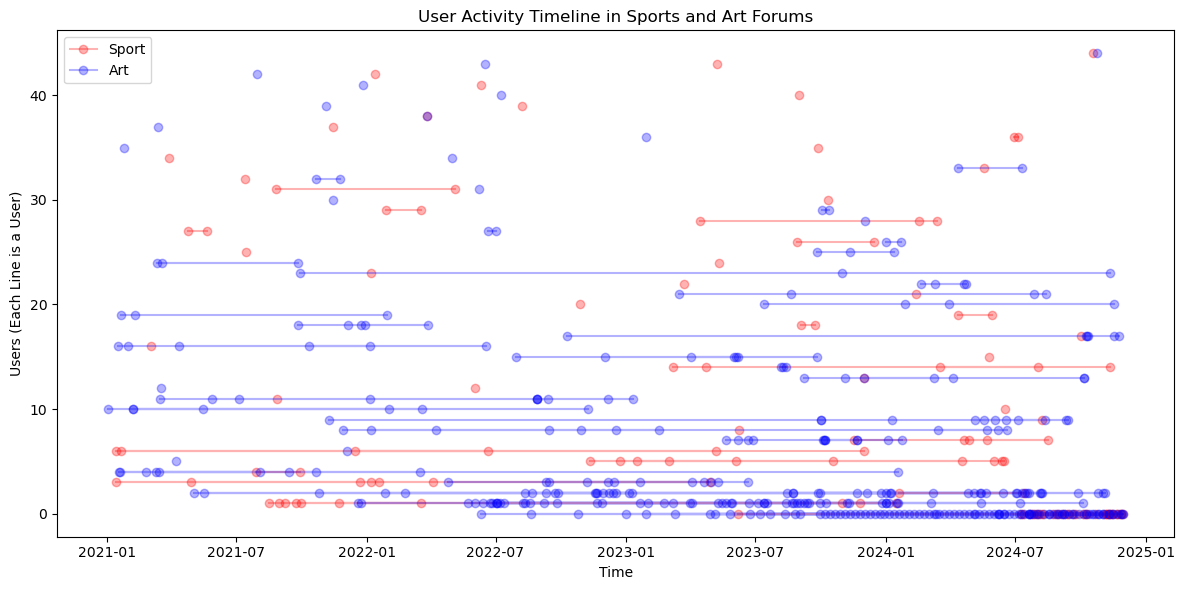

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
"""Visualize user activity in sports and art forums on a timeline."""

# Extract unique users from filtered_user_activity
cutoff_date = datetime(2023, 1, 1)
# Prepare data for visualization
user_post_counts = {}
for user in common_users:
    sport_post_count = len(filtered_sport_posts[user])
    art_post_count = len(filtered_art_posts[user])
    user_post_counts[user] = sport_post_count + art_post_count

    # Sort users by total post count (descending)
    sorted_users = sorted(user_post_counts.items(), key=lambda x: x[1], reverse=True)
sorted_users_dict = dict(sorted_users)
excel_data = []


user_timeline_data = {}
for i, user in enumerate(sorted_users_dict):
    sport_array = [
            datetime.utcfromtimestamp(post['created_utc']) 
            for post in filtered_sport_posts[user]
            if datetime.utcfromtimestamp(post['created_utc']) >= cutoff_date
        ]
    sport_array_posts = [
        post for post in filtered_sport_posts[user]
                if datetime.utcfromtimestamp(post['created_utc']) >= cutoff_date
    ]
    art_array =  [
            datetime.utcfromtimestamp(post['created_utc']) 
            for post in filtered_art_posts[user] 
            if datetime.utcfromtimestamp(post['created_utc']) >= cutoff_date
        ]
    art_array_posts = [
        post for post in filtered_art_posts[user]
                if datetime.utcfromtimestamp(post['created_utc']) >= cutoff_date
    ]
    if sport_array and art_array:
        user_timeline_data[user] = {
            'sport': sport_array,
            'art':art_array
        }
        excel_data.append({
            "User": user,
            "Sport Flair": sport_array_posts[0]['flair'],
            "Sport Subreddit": sport_array_posts[0]['subreddit'],
            "Sport Title": sport_array_posts[0]['title'],
            "Sport Description": sport_array_posts[0]['description'],
            "Sport Score": sport_array_posts[0]['score'],

            "Art Flair": art_array_posts[0]['flair'],
            "Art Subreddit": art_array_posts[0]['subreddit'],
            "Art Title": art_array_posts[0]['title'],
            "Art Description": art_array_posts[0]['description'],
            "Art Score": art_array_posts[0]['score'],
        })

# Convert the data to a DataFrame
df = pd.DataFrame(excel_data)

# Save the DataFrame to an Excel file
output_file = "user_activity.xlsx"
df.to_excel(output_file, index=False)
# Plot the timeline
plt.figure(figsize=(12, 6))
for i, (user, data) in enumerate(user_timeline_data.items()):
    # Plot sport posts
    sport_times = data['sport']
    # plt.scatter(sport_times, [i] * len(sport_times), color='red', label='Sport' if i == 1 else "", alpha=0.7)
    plt.plot(sport_times, [i] * len(sport_times), color='red', alpha=0.3, linestyle='-', marker='o', label='Sport' if i == 1 else "")

    # Plot art posts
    art_times = data['art']
    # plt.scatter(art_times, [i] * len(art_times), color='blue', label='Art' if i == 1 else "", alpha=0.7)
    plt.plot(art_times, [i] * len(art_times), color='blue', alpha=0.3, linestyle='-', marker='o', label='Art' if i == 1 else "")

plt.title('User Activity Timeline in Sports and Art Forums')
plt.xlabel('Time')
plt.ylabel('Users (Each Line is a User)')
plt.legend()
plt.tight_layout()
plt.show()

